# Udacity Machine Learning Nanodegree
--------------


## Capstone Project on Vehicle-Detection
---------------


### Application of Best SVM model (LinearSVC) to detect vehicle from Images and Video:

#### Imports

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
from scipy.ndimage.measurements import label

In [2]:
import pickle
%matplotlib inline

In [3]:
from scipy.ndimage.measurements import label
from collections import deque
from moviepy.editor import VideoFileClip
from IPython.display import HTML

--------

### 1. Manual Vehicle Detection

#### 1.1 Drawing rectangles over an image

In [4]:
from project.utils import draw_boxes,find_matches,plot3d

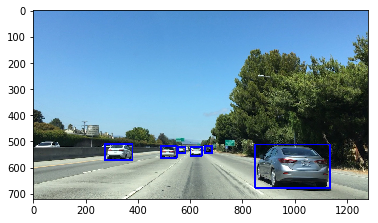

In [5]:
image = mpimg.imread('car.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output


# Here are the bounding boxes I used
bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]


result = draw_boxes(image, bboxes)
plt.imshow(result)

#### 1.2 Templet Matching

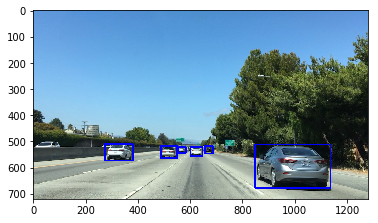

In [6]:
image = mpimg.imread('car.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['cutouts/cutout1.jpg', 'cutouts/cutout2.jpg', 'cutouts/cutout3.jpg',
            'cutouts/cutout4.jpg', 'cutouts/cutout5.jpg', 'cutouts/cutout6.jpg']
bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)

--------

### 2. Utilities

#### 2.1 Sliding window

In [7]:
from project.utils import slide_window

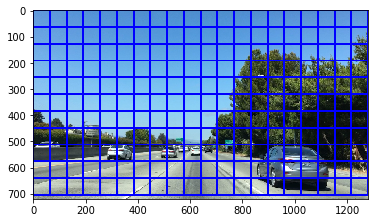

In [8]:
image = mpimg.imread('car.jpg')
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

---------

#### 2.2 Multi scale window

In [9]:
from project.utils import draw_multi_scale_windows

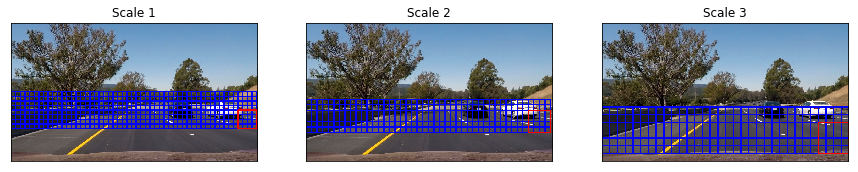

In [10]:
img = mpimg.imread('test_images/test6.jpg')

plt.figure(figsize=(15,10))
subpltcount=1
for (ystart, ystop, scale) in [(360, 560, 1.5), (400, 600, 1.8), (440, 700, 2.5)]:
    
    plt.subplot(1,3,subpltcount)
    plt.imshow(draw_multi_scale_windows(img, ystart, ystop, scale))
    plt.title('Scale %s'%subpltcount)
    plt.xticks([])
    plt.yticks([])
    subpltcount +=1

------

### 3. Vehicle detection in Image 

#### 3.1 Parameter setting

In [11]:
from project.vehicle_detector import findCars
dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
ystart  = 400
ystop = 656
scale = 1.5
svc  =  dist_pickle["svc"]
X_scalar = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block  = dist_pickle["cell_per_block"]
spatial_size = (32,32)
hist_bins = 32
hog_channel = "ALL"
colorspace = 'YCrCb'

##### 3.2 Application to images

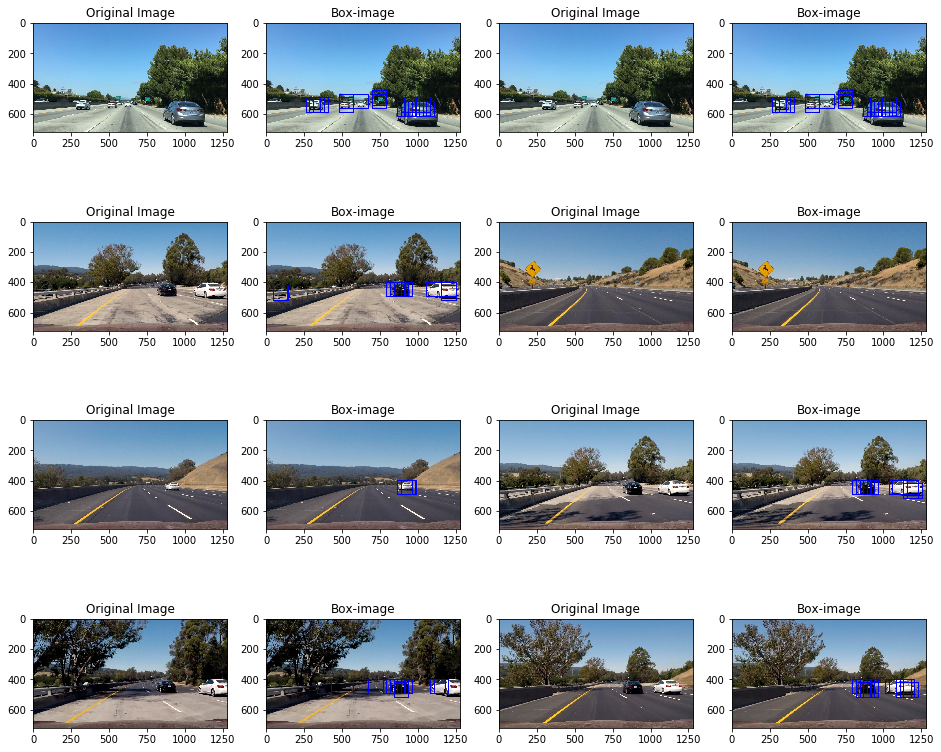

In [12]:
directory = 'test_images/*.jpg'
globDir = glob.glob(directory)
fig = plt.figure(figsize=(16,14))

n1 = 4
n2 = 4
color_space='YCrCb'
count = 1
for k,img in enumerate(globDir):
    Img = mpimg.imread(img)
    
    out_img = findCars(Img, ystart, ystop, scale,\
                    svc, X_scalar, color_space,\
                    orient, pix_per_cell, cell_per_block,\
                    hog_channel, spatial_size, hist_bins)
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img)
    plt.title('Original Image')
    count += 1

    
     #fig-2
    fig.add_subplot(n1,n2,count)
    plt.imshow(out_img)
    plt.title('Box-image')
    count += 1
    

----------

### 4. Vehicle Detecton Pipeline for Video

---------

In [13]:
from project.vehicle_detector import DetectVehicle

##### 4.1 Parameter setting

In [14]:
dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
param_dict = {}
param_dict['svc']  =  dist_pickle["svc"]
param_dict['X_scalar'] = dist_pickle["scaler"]
param_dict['orient'] = dist_pickle["orient"]
param_dict['pix_per_cell'] = dist_pickle["pix_per_cell"]
param_dict['cell_per_block']  = dist_pickle["cell_per_block"]
param_dict['spatial_size'] = (32,32)
param_dict['hist_bins'] = 32

#### 4.2 Application of heatmap

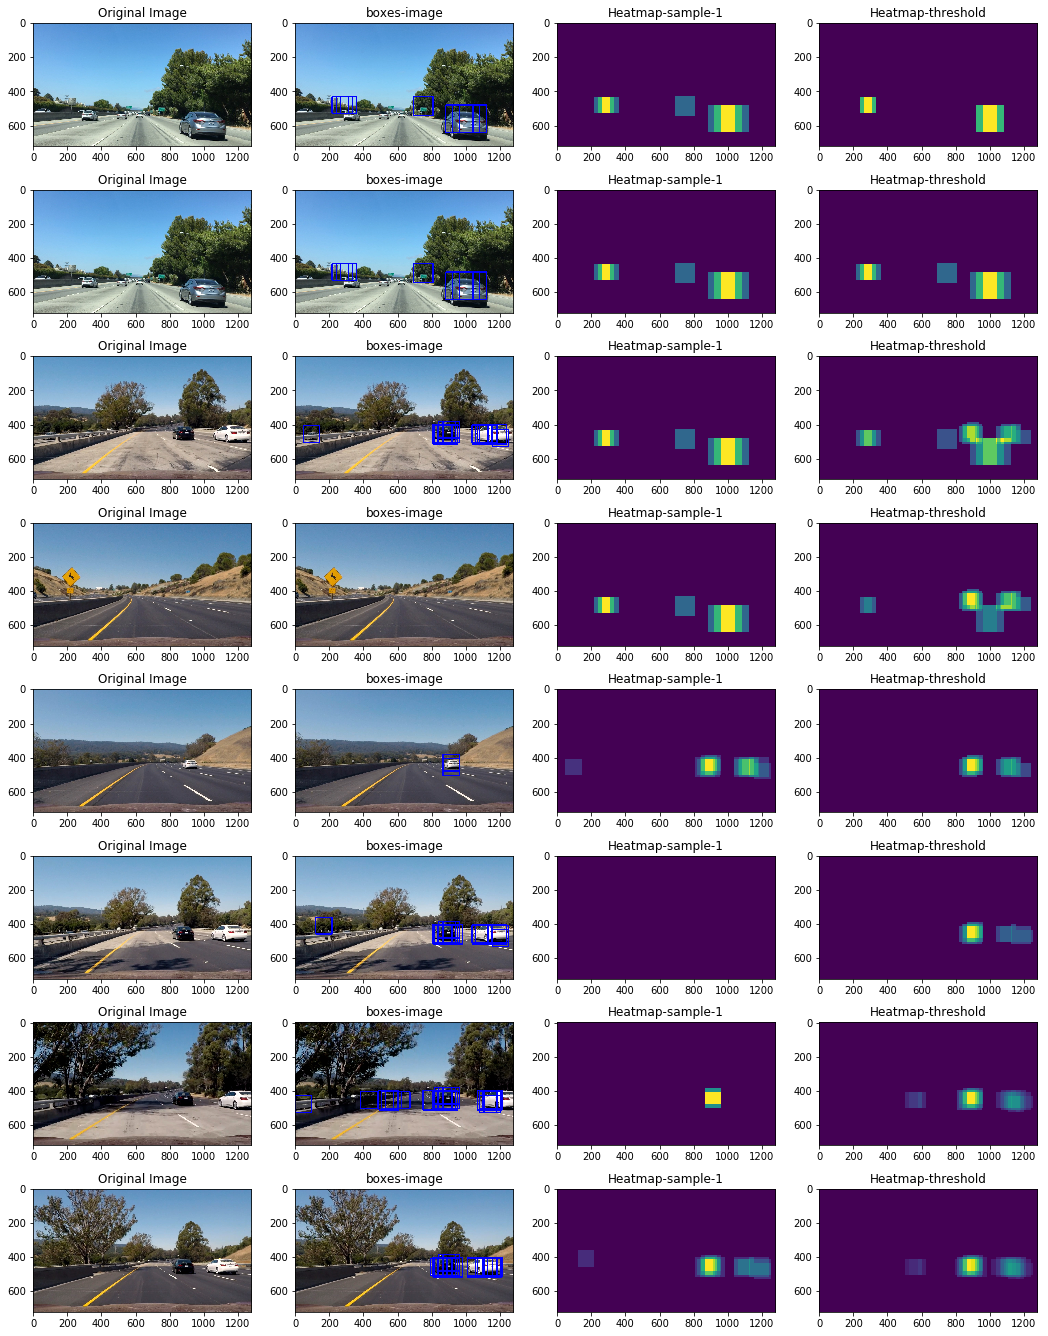

In [15]:
directory = 'test_images/*.jpg'
globDir = glob.glob(directory)
fig = plt.figure(figsize=(18,24))
DV = DetectVehicle(param_dict)
n1 = 8
n2 = 4

count = 1
for k,img in enumerate(globDir):
    Img = mpimg.imread(img)
    boxes = DV.find_cars(Img,vid=False,vis=True)
    [draw_img_,heatmap] = DV.find_cars(Img,vid=False,vis=False)
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img)
    plt.title('Original Image')
    count += 1
   
    #fig-2
    fig.add_subplot(n1,n2,count)
    box_Img = draw_boxes(Img, boxes)
    plt.imshow(box_Img)
    plt.title('boxes-image')
    count += 1

    #fig-3
    fig.add_subplot(n1,n2,count)
    plt.imshow(DV.heat_images[0])
    plt.title('Heatmap-sample-1')
    count += 1
  
    
     #fig-5
    fig.add_subplot(n1,n2,count)
    plt.imshow(DV.heatmap)
    plt.title('Heatmap-threshold')
    count += 1
    
   

-------

#### 4.3 Application of threshold over heatmap

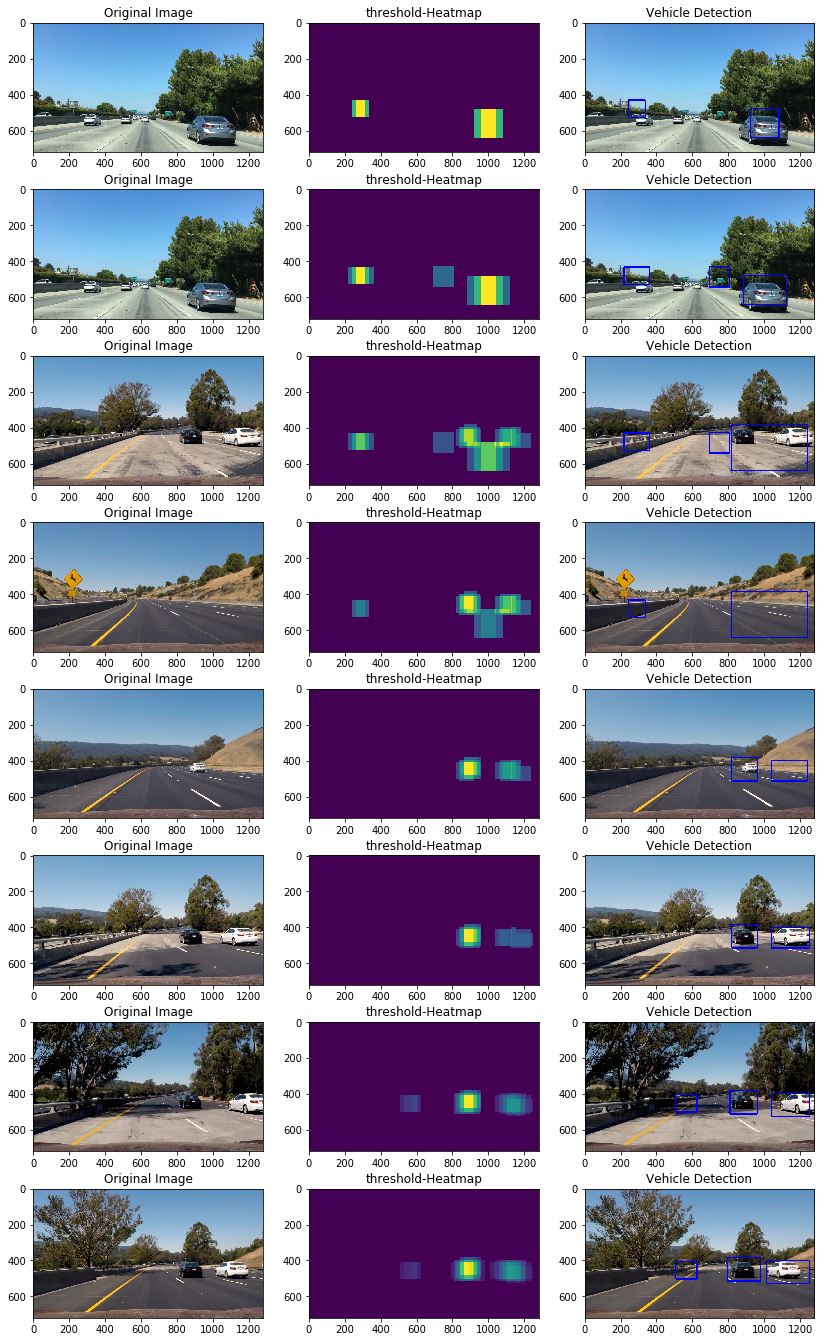

In [13]:
directory = 'test_images/*.jpg'
globDir = glob.glob(directory)
fig = plt.figure(figsize=(14,24))
DV = DetectVehicle(param_dict)

count = 1
for k,img in enumerate(globDir):
    Img = mpimg.imread(img)
    [draw_img,heatmap] = DV.find_cars(Img,vid=False,vis=False)
    
    #fig-1
    fig.add_subplot(8,3,count)
    plt.imshow(Img)
    plt.title('Original Image')
    count += 1
    
    #fig-2
    fig.add_subplot(8,3,count)
    plt.imshow(heatmap)
    plt.title('threshold-Heatmap')
    count += 1
    
    #fig-3
    fig.add_subplot(8,3,count)
    plt.imshow(draw_img)
    plt.title('Vehicle Detection')
    count += 1

-------

#### 4.4 Application to videos

##### 4.4.1 Test video

In [14]:
white_output = 'test_video_output.mp4'
clip = VideoFileClip("test_video.mp4")#.subclip(t_start=30,t_end=35)
white_clip = clip.fl_image(DV.find_cars)
%time white_clip.write_videofile(white_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video test_video_output.mp4
[MoviePy] Writing video test_video_output.mp4


 97%|█████████▋| 38/39 [00:20<00:00,  1.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output.mp4 

CPU times: user 18.4 s, sys: 1.77 s, total: 20.2 s
Wall time: 22.2 s


##### 4.4.2 Project Video

In [15]:
white_output = 'project_video_output.mp4'
clip = VideoFileClip("project_video.mp4")#.subclip(t_start=30,t_end=35)
white_clip = clip.fl_image(DV.find_cars)
%time white_clip.write_videofile(white_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [10:21<00:00,  2.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 9min 4s, sys: 53.3 s, total: 9min 57s
Wall time: 10min 22s


----------

#### Both lane and vehicle detection

In [38]:
white_output = 'project_video2_output.mp4'
clip = VideoFileClip("project_video2.mp4")#.subclip(t_start=30,t_end=35)
white_clip = clip.fl_image(DV.find_cars)
%time white_clip.write_videofile(white_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video project_video2_output.mp4
[MoviePy] Writing video project_video2_output.mp4


100%|█████████▉| 1260/1261 [10:34<00:00,  1.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video2_output.mp4 

CPU times: user 9min 40s, sys: 54.3 s, total: 10min 35s
Wall time: 10min 34s


---------